# Graph visualization
This notebook can be used to visualize a graph and its edge weights.
In doing so we can directly observe the effect of applying an edge reweighting algorithm to a graph.

In [2]:
import torch
import dgl

from crosswalk_reproduction.data_provider.graph_synthesizer import synthesize_graph
from crosswalk_reproduction.utils.visualization import visualize_graph
from crosswalk_reproduction.preprocessor.crosswalk import get_crosswalk_weights
from crosswalk_reproduction.graphs import get_uniform_weights

/mnt/mass_storage/anaconda3/envs/crosswalk-m/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


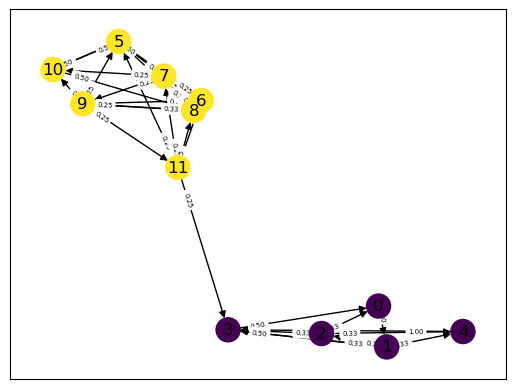

In [23]:
# Create and visualize graph with uniform weights
g = synthesize_graph(node_counts=[5, 7], edge_probabilities=[[0.5,0.01],[0.01, 0.5]], self_connection_prob=0)
assert (g.out_degrees() != 0).all(), "Initialization failed because g contains nodes without outgoing edges. Please run again."

# Initialize weights uniformly
g.edata["weights"] = get_uniform_weights(g)
visualize_graph(g, node_color_key="groups", edge_label_key="weights")

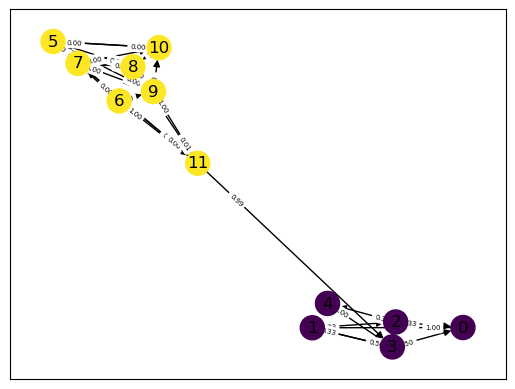

In [44]:
# Apply crosswalk and visualize again
g.edata["weights"] = get_crosswalk_weights(g, 0.99, 1, 5, 1000, "groups", "weights")
visualize_graph(g, node_color_key="groups", edge_label_key="weights")